(0.0, 2.0, 0.0, 15.0)

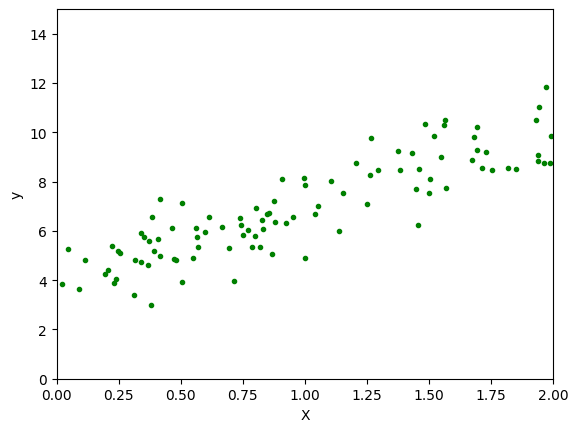

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.plot(X, y, "g.")
plt.axis([0, 2, 0, 15])


In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best



array([[3.9408304 ],
       [3.06129724]])

[[1. 0.]
 [1. 2.]]
[[3.9408304 ]
 [3.06129724]]
[[ 3.9408304 ]
 [10.06342487]]


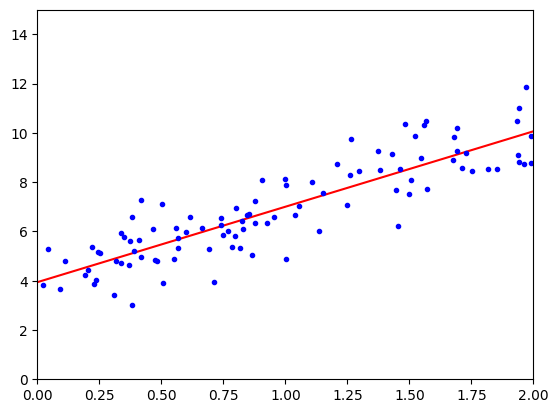

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
print(X_new_b)
print(theta_best)
y_predict = X_new_b.dot(theta_best)
print(y_predict)
#Let’s plot this model’s predictions:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
pred=lin_reg.predict(X_new)
pred



array([[ 3.9408304 ],
       [10.06342487]])

[[3.98673026]
 [3.02095796]]


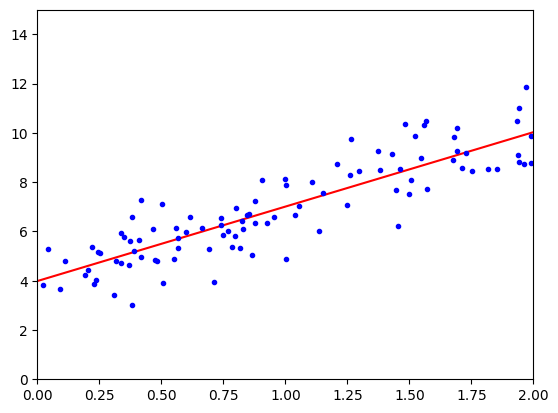

In [ ]:
eta = 0.1  # learning rate
n_iterations = 100
m = 100
theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r")
print(theta)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance theta_best = np.linalg.inv(X_b.T.dot (X_b)).dot (X_b.T).dot(y) theta_best



[[3.89339656]
 [3.10298467]]


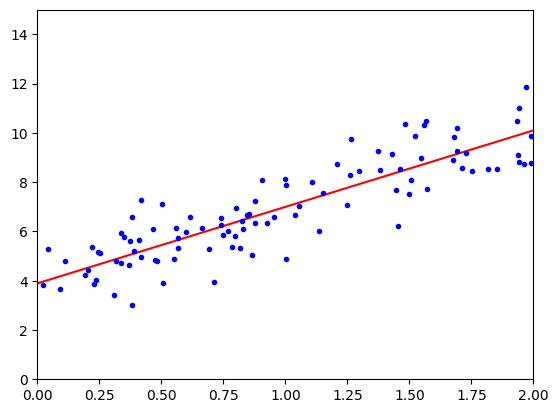

[[3.9408304 ]
 [3.06129724]]


In [ ]:
eta = 0.1  # learning rate
n_iterations = 100
m = 100
theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r")
print(theta)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.94268768]
 [3.07277692]]


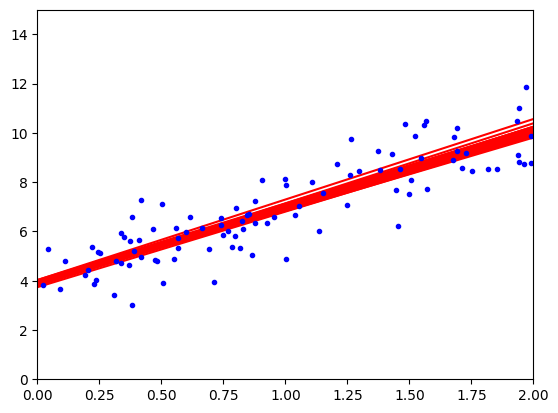

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
n_epochs = 500
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new, y_predict, "r")
print(theta)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
companies=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1000_Companies.csv")
coulumns=companies.columns
companies.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-13-5095bbf919f8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

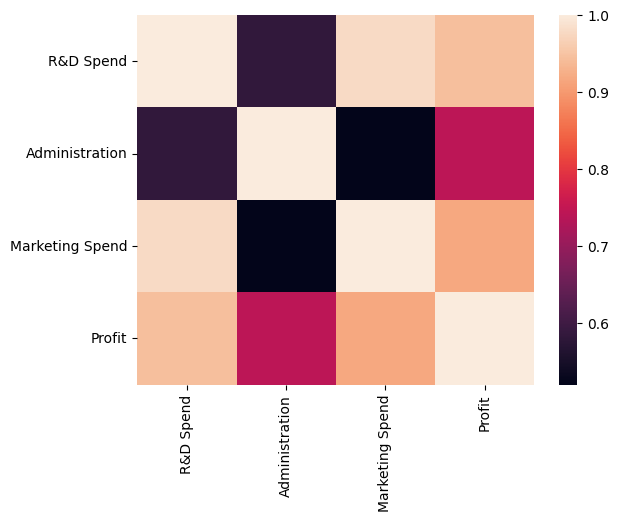

In [ ]:
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
X[:5]
# Data Visualization
# Building the Correlation matrix
sns.heatmap(companies.corr())



In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X[:5]



array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("Predicted:",y_pred[:5])
print("Actual:",y_test[:5])
# Calculating the Coefficients
print(regressor.coef_)
# Calculating the Intercept
print(regressor.intercept_)



In [ ]:
y_pred = regressor.predict(X_test)

print("Predicted:",y_pred[:5])
print("Actual:",y_test[:5])
print(regressor.coef_)
print(regressor.intercept_)

Predicted: [ 89624.88499984  88261.44060358  94728.57723845 176034.49990954
  83234.84214495]
Actual: [ 89012.02672  87654.55773  94093.35179 175396.2616   83356.61784]
[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]
-51144.726425721805


In [ ]:
# Calculating the R squared value, # The mean squared error
from sklearn.metrics import r2_score,mean_squared_error
print("R squared value: %.2f" %r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



R squared value: 0.91
Mean squared error: 192169702.50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X[:5],y[:5]
sc=StandardScaler()
X_transform=sc.fit_transform(X)
print(X_transform[:5])



[[ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
  -0.91245053 -0.05449919  0.41853093 -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 -0.55350458 -0.17762425 -0.40288615
   1.56441355 -0.83030083 -1.43658851 -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 -0.1192138  -0.95867356 -0.71889748
  -0.68024452 -0.05449919  0.06015558 -0.54515416]
 [-1.87244107 -0.93853666 -0.24377122 -0.77064997  0.25629203  0.52539714
  -0.75764652  0.72130245  0.47698252 -0.19682291]
 [ 0.11317236 -0.93853666 -0.76494435  0.45984057  0.08272552  0.32789006
   0.17117751 -0.05449919 -0.67250161 -0.98056821]]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_transform, y)
lin_reg.intercept_, lin_reg.coef_



(152.13348416289594,
 array([ -0.47612079, -11.40686692,  24.72654886,  15.42940413,
        -37.67995261,  22.67616277,   4.80613814,   8.42203936,
         35.73444577,   3.21667372]))

array([[152.13348416],
       [ -0.41840749],
       [-11.3421185 ],
       [ 24.87245026],
       [ 15.37241581],
       [-25.12487053],
       [ 12.71377216],
       [ -0.80893139],
       [  6.81977365],
       [ 31.05627907],
       [  3.26284692]])

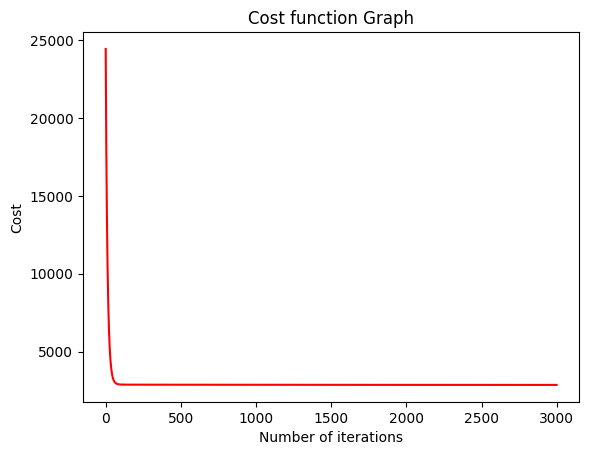

In [ ]:
from sklearn.metrics import mean_squared_error
def Multivariable_Linear_Regression1(X,y,learningrate, iterations):
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = np.c_[np.ones((len(X), 1)), X]
    theta = np.random.randn(len(X[0])+1, 1)
    m = len(X)
    cost_1st=[]
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        total=mean_squared_error(y_pred, y)
        cost_lst.append(total)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta
Multivariable_Linear_Regression1(X_transform,y, 0.02, 3000)




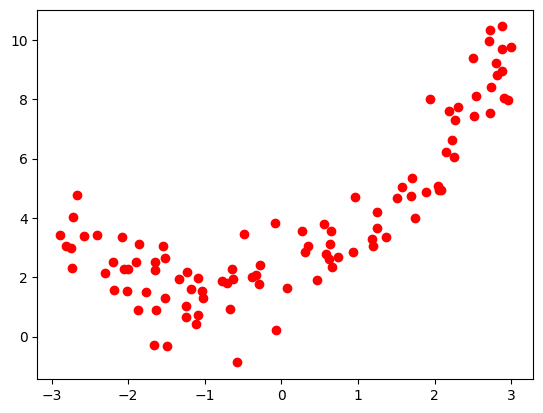

In [ ]:
# y = 0 . 5x1 2 + 1 . 0x1 + 2 . 0 + Gaussian noise
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y, c='red', label='Scatter Plot')
plt.show()



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
#X_poly contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data
print("Poly Features",X_poly[0],X_poly[1])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Parameters", lin_reg.intercept_, lin_reg.coef_)



Poly Features [-0.49331179  0.24335652] [0.93964175 0.88292661]
Parameters [1.95726404] [[0.97853146 0.53575455]]


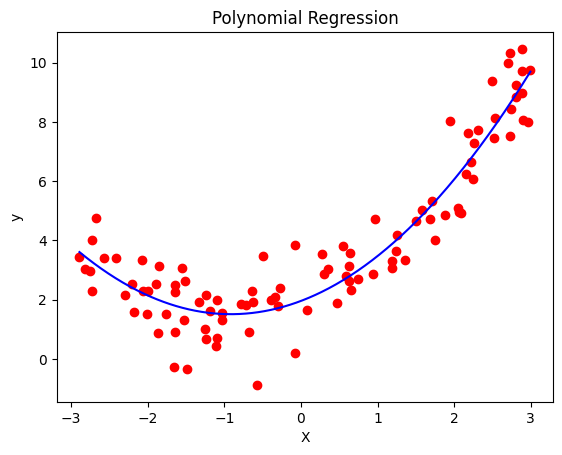

In [ ]:
plt.scatter(X, y, color = 'red') # plotting the training set
myline = np.linspace(min(X), max(X), 500)
plt.plot(myline, lin_reg.predict(poly_features.fit_transform(myline)), color = 'blue')
plt.title('Polynomial Regression') # adding a tittle to our plot
plt.xlabel('X')
plt.ylabel('y')
plt.show()



In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred=ridge_reg.predict(X_test)
print("R squared value: %.2f" %r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



R squared value: 0.91
Mean squared error: 192167615.75


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred=lasso_reg.predict(X_test)
print("R squared value: %.2f" %r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



R squared value: 0.91
Mean squared error: 192169231.23


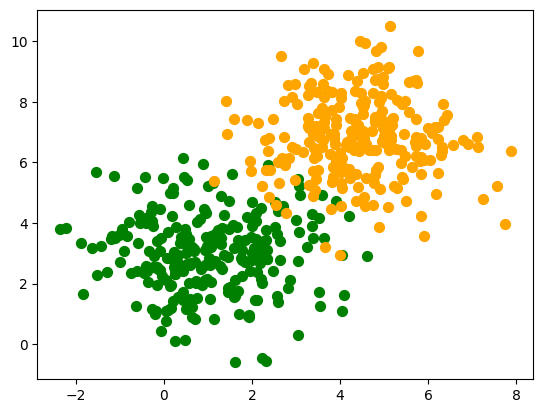

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 500
data, labels = make_blobs(n_samples=n_samples,
                             centers=([1.1, 3], [4.5, 6.9]),
                             cluster_std=1.3,
                             random_state=0)
colours = ('green', 'orange')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colours[n_class],
               s=50,
               label=str(n_class))



In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels  = train_test_split(data, labels, test_size=0.2)
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(train_data, train_labels)
from sklearn.metrics import accuracy_score
predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)
p.score(train_data, train_labels)



score on train data:  0.9225
score on test data:  0.97


0.9225

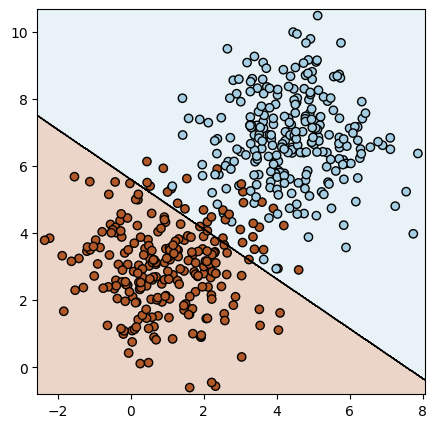

In [ ]:
import numpy as np
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
plot_decision_boundary(p,data,labels)



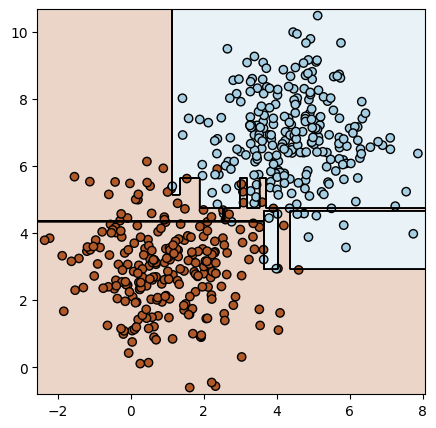

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(data, labels)
plot_decision_boundary(tree,data,labels)

